In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 

In [2]:
file_path = ("C:/Users/onkar/Documents/Project - 3&4_Multiple_Reg/ToyotaCorolla.csv")
data = pd.read_csv(file_path, encoding='latin1')
print(data.head(5))

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

In [3]:
df = data.copy()
df.head(10)

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5   6     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   
6   7   TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  16900         27   
7   8   TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8   9     TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
9  10     TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  12950         23   

   Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel   90          1  ...            1   
1         10      2002  72937    Diesel   90          1  ...            1   
2          9      2002  41711    Diesel   90          1  ...            0   
3          7      2002  48000    Diesel   90          0  ...            0   
4          3      2002  38500    Diesel   90          0  ...            1   
5          1      2002  61000    Diesel   90          0  ...            1   
6          6      2002  94612    Diesel   90          1  ...            1   
7          3      2002  75889    Diesel   90          1  ...            1   
8          6      2002  19700    Petrol  192          0  ...            1   
9         10      2002  71138    Diesel   69          0  ...            0   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   
5                1               1      0          1            0   
6                1               1      0          0            1   
7                1               1      0          0            0   
8                1               1      1          0            0   
9                0               1      0          0            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  
5                 1             0               0        0  
6                 1             0               0        0  
7                 1             0               0        0  
8                 0             1               1        0  
9                 1             0               0        0  

[10 rows x 38 columns]

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


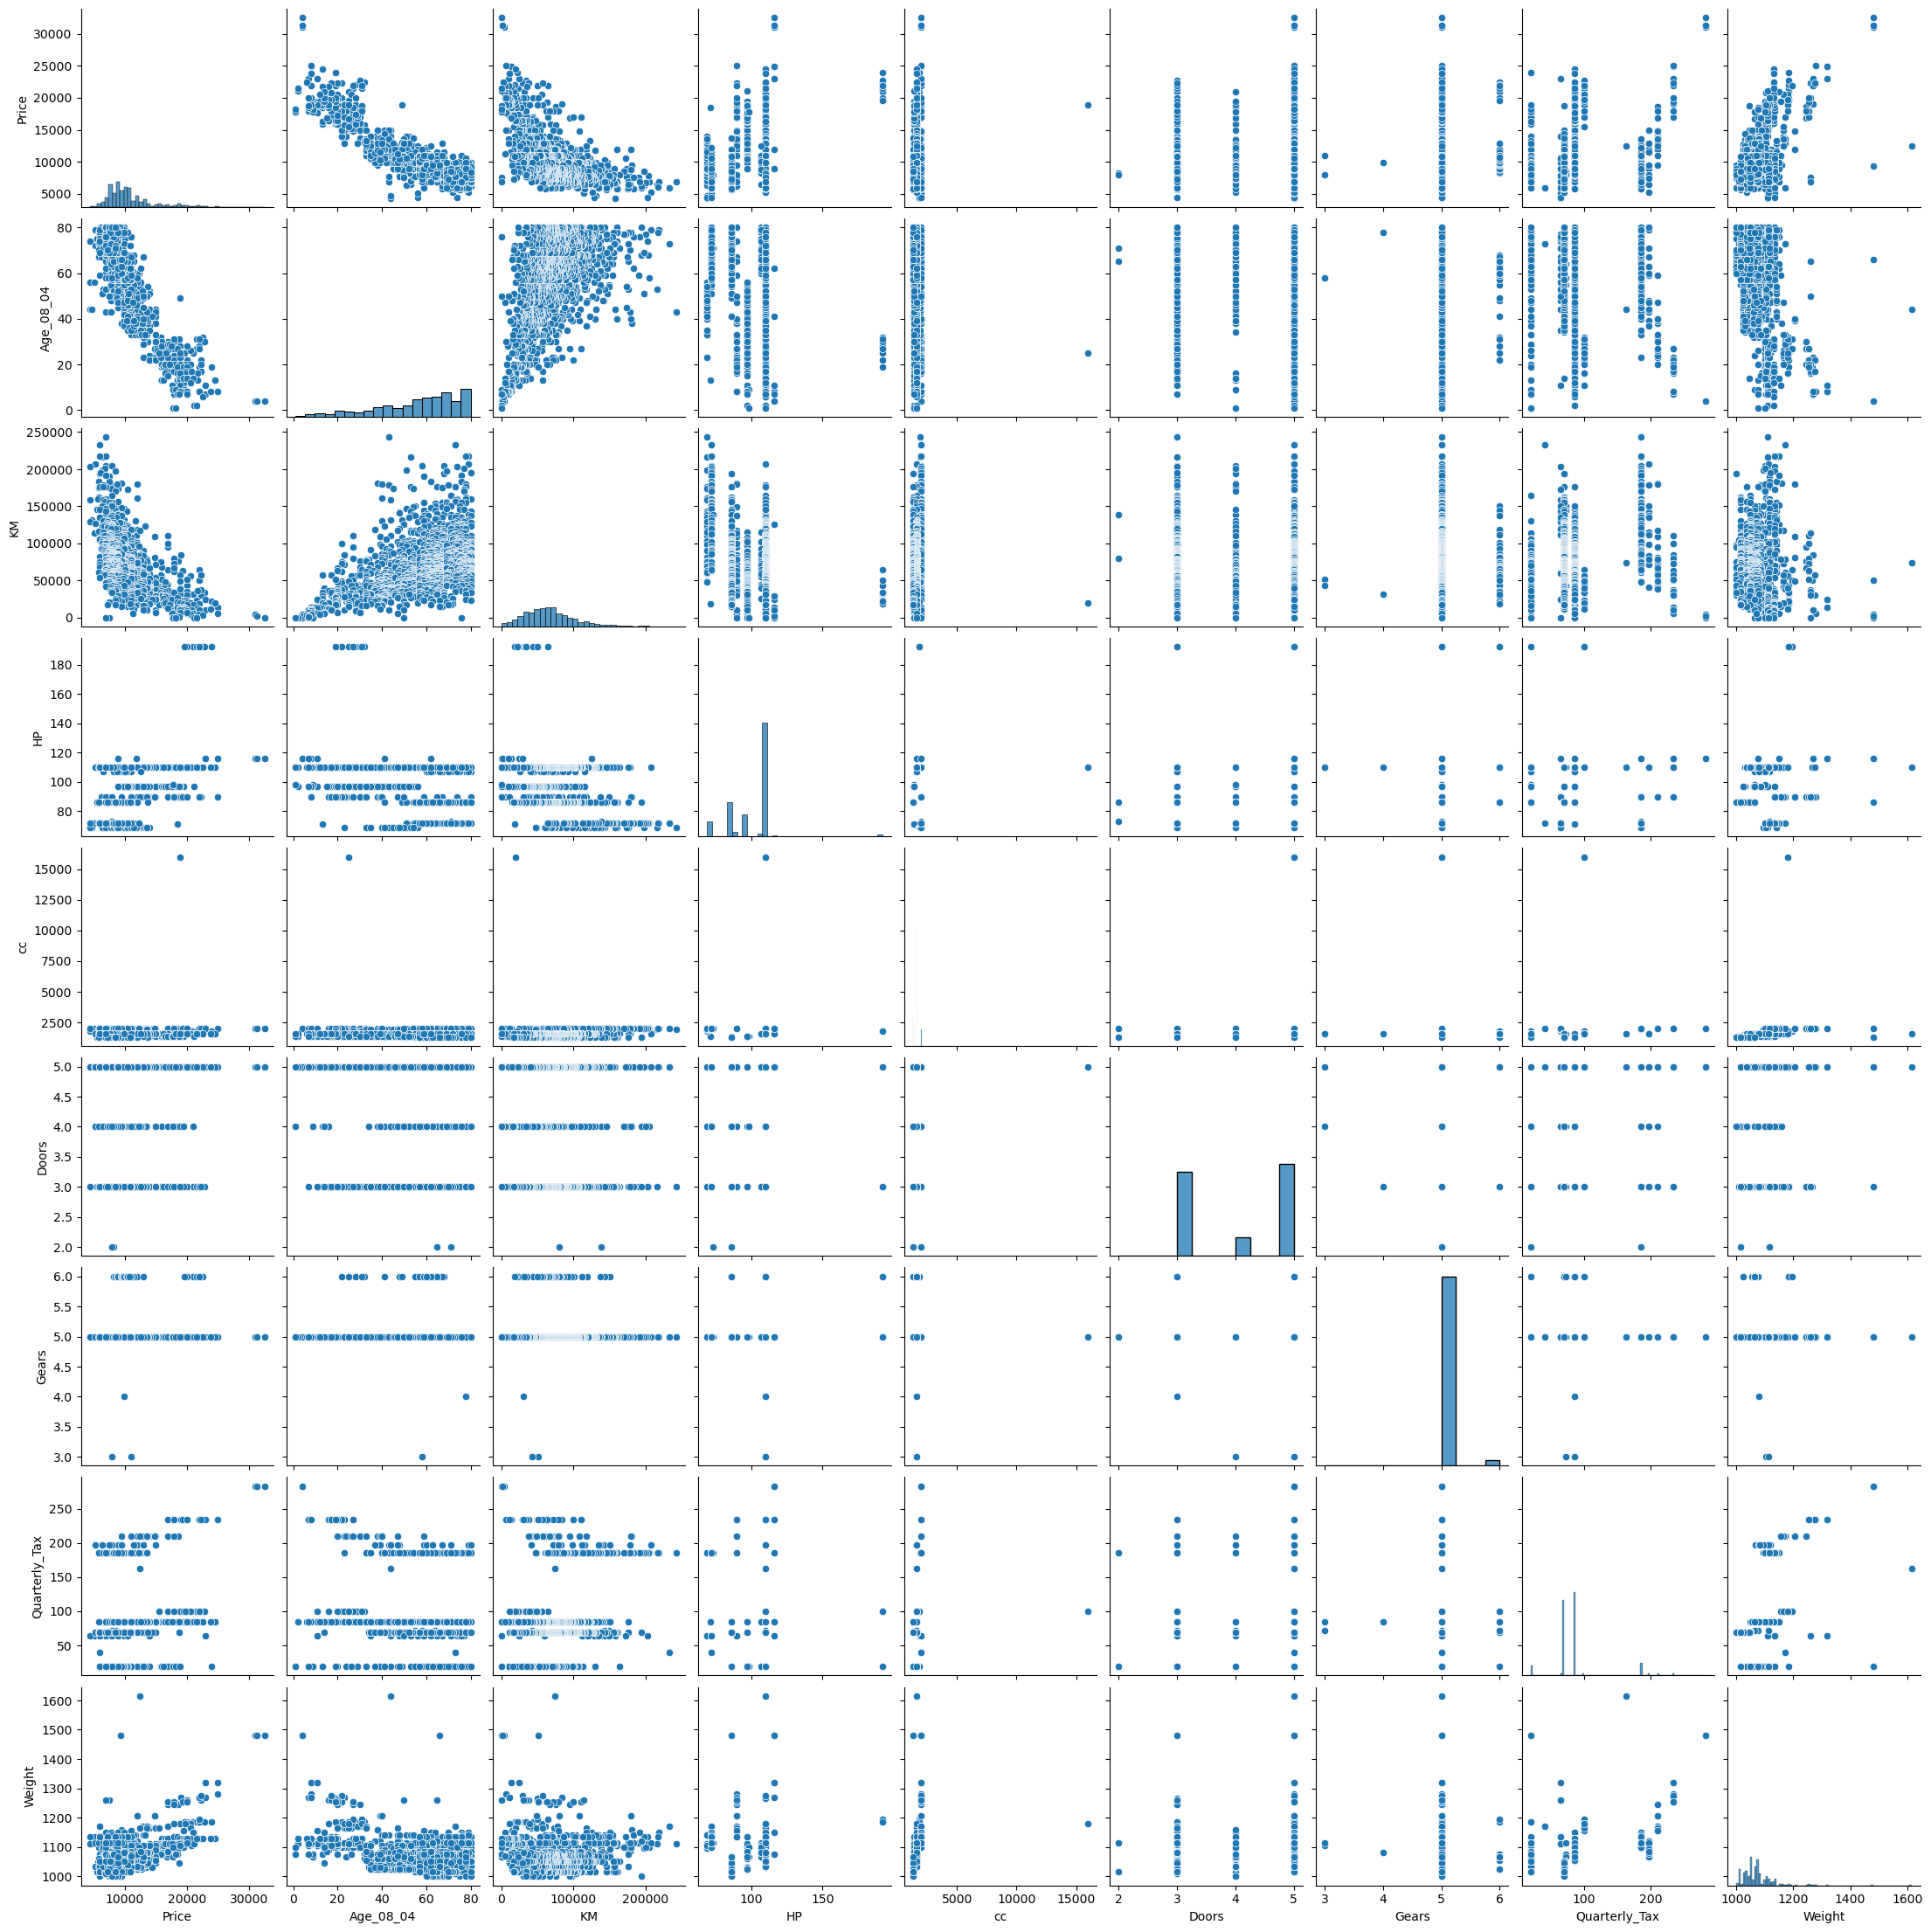

In [6]:
sns.pairplot(df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']])
plt.savefig('graphs/prj4pairplot.png')
plt.show()

### Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler
df.dropna(inplace = True)

In [8]:
feature = ['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
X = df[feature]
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

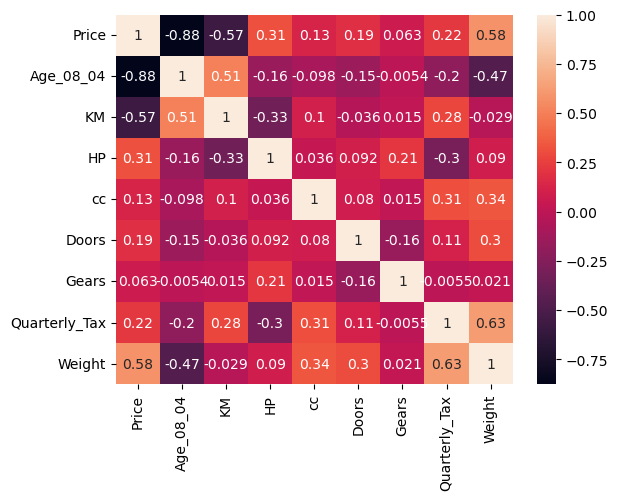

In [9]:
numeric_cols = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
corr = data[numeric_cols].corr()
sns.heatmap(corr, annot=True)
plt.savefig('graphs/prj4correlation_heatmap.png')
plt.show()

### Model Building 

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train,y_train)

LinearRegression()

In [13]:
pred = model.predict(X_test)
print("The model prediction Completed")

The model prediction Completed


In [14]:
r2 = r2_score(y_test,pred)
print("The Acuuracy of the model is ", r2*100,"%")

The Acuuracy of the model is  85.38352805672253 %


In [15]:
results = pd.DataFrame({"Model": ["Linear Regression"], "R² Value": [r2]})
print(results)


               Model  R² Value
0  Linear Regression  0.853835
